In [12]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt

In [13]:
n_of_calsses= 10
model_path='mnist_model.h5'

In [14]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [15]:
X_train=X_train.reshape(len(X_train),784)
X_test=X_test.reshape(len(X_test),784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
y_train_one_hot=tensorflow.keras.utils.to_categorical(y_train,n_of_calsses)
y_test_one_hot=tensorflow.keras.utils.to_categorical(y_test,n_of_calsses)

In [17]:
model= Sequential()
model.add(Dense(512,activation='relu',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1),input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1)))
model.add(Dropout(0.2))
model.add(Dense(n_of_calsses,activation='softmax',bias_initializer=tensorflow.keras.initializers.Constant(value=0.1)))


In [18]:
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(X_train,y_train_one_hot,shuffle=True,epochs=1500,validation_split=0.15,verbose=1,callbacks=
                  [EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=0,mode='min'),
                   ModelCheckpoint(model_path,monitor='val_loss',save_best_only=True,mode='min',verbose=0)])

Train on 51000 samples, validate on 9000 samples
Epoch 1/1500
51000/51000 [==============================] - 10s 192us/sample - loss: 0.2297 - accuracy: 0.9304 - val_loss: 0.1055 - val_accuracy: 0.9682
Epoch 2/1500
51000/51000 [==============================] - 9s 177us/sample - loss: 0.1084 - accuracy: 0.9665 - val_loss: 0.0812 - val_accuracy: 0.9753
Epoch 3/1500
51000/51000 [==============================] - 9s 178us/sample - loss: 0.0836 - accuracy: 0.9739 - val_loss: 0.0876 - val_accuracy: 0.9754
Epoch 4/1500
51000/51000 [==============================] - 9s 184us/sample - loss: 0.0677 - accuracy: 0.9783 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 5/1500
51000/51000 [==============================] - 9s 181us/sample - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0802 - val_accuracy: 0.9771
Epoch 6/1500
51000/51000 [==============================] - 9s 180us/sample - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0826 - val_accuracy: 0.9791
Epoch 7/1500
51000/51000 [============

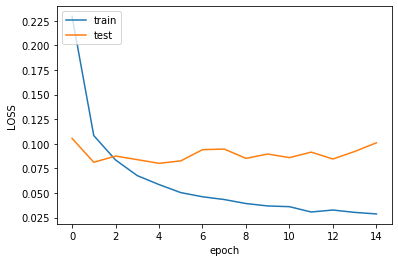

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
estimator = load_model(model_path)
test_input = np.array([X_test[1]])
prediction=np.argmax(estimator.predict(test_input))
print("Prediction: ", prediction)
print("Ground Truth: ", y_test_one_hot[1])

Prediction:  2
Ground Truth:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
estimator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [30]:
score=estimator.evaluate(X_test,y_test_one_hot)

In [31]:
print('Accuracy: ',score[1]*100.0)

Accuracy:  98.00999760627747
